# Credit Card Lead Prediction <br>
This competition provides a unique opportunity for Data Science beginners to participate in a Hackathon style challenge for Data Science and compete for potential opportunities in many reputed companies.<br>
It also provides the unique opportunities for beginners to get their hands dirty and indulge is practical application of ML and do one of the basic tasks machine learning algorithms are capable of doing:- Classification.<br>

If you find this notebook useful and use parts of it in your work, please don't forget to show your appreciation by upvoting this kernel. That keeps me motivated and inspires me to write and share these public kernels. <br>

### Problem Statement <br>
Our client, Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products.<br>
They also cross-sell products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc.<br>
In this case, they want to cross sell its credit cards to its existing customers.<br>
The bank has identified a set of customers that are eligible for taking these credit cards.<br>
Given historic data and other data of the customers we have to identify which customers are most likely to accept our cross-sell offer.<br>

### Data Description:- <br>
We have the following information regarding the customer:

- Customer details (gender, age, region etc.)
- Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

### Expected Outcome:-<br>
- Build a model to predict whether the person will be interested in buying the Credit card offered by our client.
- Grading Metric: ROC_AUC_SCORE

### Problem Category:-
For the data and objective, it’s evident that this is a Binary Classification Problem in the Tabular Data format.<br>

So without further ado, let's now start with some basic imports to take us through this journey of Lead prediction:-<br>

## Importing the data set

In [1]:
## Importing the Libaries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Importing the data set train and test
df= pd.read_csv('/content/train.csv')
df_test= pd.read_csv('/content/test.csv')

In [3]:
  print("Shape of Train Data set:", df.shape)
print("Shape of Test Data set:", df_test.shape)

Shape of Train Data set: (245725, 11)
Shape of Test Data set: (105312, 10)


In [4]:
## Combining the train and test dataset in one file
df['source']= 'train'
df_test['source']= 'test'

card= pd.concat([df, df_test], ignore_index=True)
print(df.shape, df_test.shape, card.shape)

(245725, 12) (105312, 11) (351037, 12)


In [5]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   351037 non-null  object 
 1   Gender               351037 non-null  object 
 2   Age                  351037 non-null  int64  
 3   Region_Code          351037 non-null  object 
 4   Occupation           351037 non-null  object 
 5   Channel_Code         351037 non-null  object 
 6   Vintage              351037 non-null  int64  
 7   Credit_Product       309190 non-null  object 
 8   Avg_Account_Balance  351037 non-null  int64  
 9   Is_Active            351037 non-null  object 
 10  Is_Lead              245725 non-null  float64
 11  source               351037 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 32.1+ MB


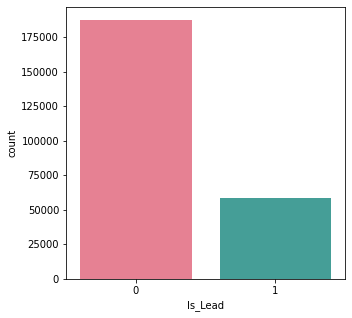

In [6]:
## Barplot
plt.figure(figsize=(5,5))
sns.countplot(x='Is_Lead', data= df, palette= 'husl')

In [7]:
card.describe(include= 'all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
count,351037,351037,351037.000000,351037,351037,351037,351037.000000,309190,3.510370e+05,351037,245725.000000,351037
unique,351037,2,NaN,35,4,4,NaN,2,NaN,2,NaN,2
top,YNC4FYXT,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN,train
freq,1,191902,NaN,51059,144078,148202,NaN,205965,NaN,214087,NaN,245725
mean,NaN,NaN,43.860716,NaN,NaN,NaN,46.924244,NaN,1.130141e+06,NaN,0.237208,NaN
std,NaN,NaN,14.841932,NaN,NaN,NaN,32.329303,NaN,8.569530e+05,NaN,0.425372,NaN
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000,NaN
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.041850e+05,NaN,0.000000,NaN
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.951620e+05,NaN,0.000000,NaN
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.368152e+06,NaN,0.000000,NaN


### Missing Value Treatment

In [8]:
card.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64

In [9]:
## checking the unique value in Credit Product
card['Credit_Product'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [10]:
## Filling null values with 'No info'
card['Credit_Product'].fillna('No info', inplace= True)

In [11]:
## Checking for any more missing values
card.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64

In [12]:
## Checking the duplicate values
card.duplicated().any()

False

## Checking for outliers

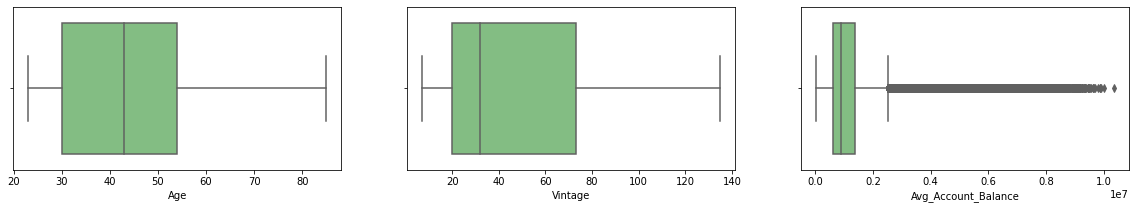

In [13]:
## Appling box plot by comparing amount and class Columns
plt.figure(figsize=(20,3))
plt.subplot(1,3,1)
sns.boxplot(x= 'Age',  data= card, palette= 'YlGn_r')
plt.subplot(1,3,2)
sns.boxplot(x= 'Vintage',  data= card, palette= 'YlGn_r')
plt.subplot(1,3,3)
sns.boxplot(x= 'Avg_Account_Balance',  data= card, palette= 'YlGn_r')
plt.show()

## EDA

### 1. Average Account Balance

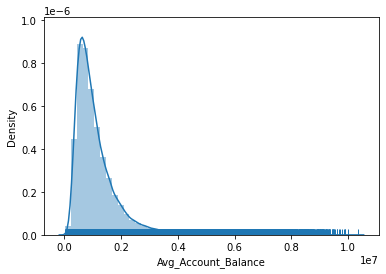

In [14]:
sns.distplot(card['Avg_Account_Balance'], rug=True, hist= True, kde=True)

In [15]:
## log_transformation 
card['Avg_Account_Balance'] = np.log(card['Avg_Account_Balance'])

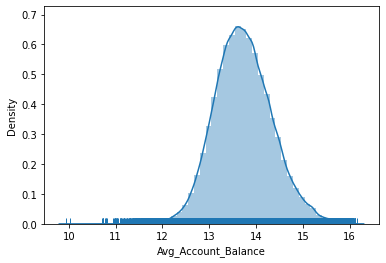

In [16]:
sns.distplot(card['Avg_Account_Balance'], rug=True, hist= True, kde=True)

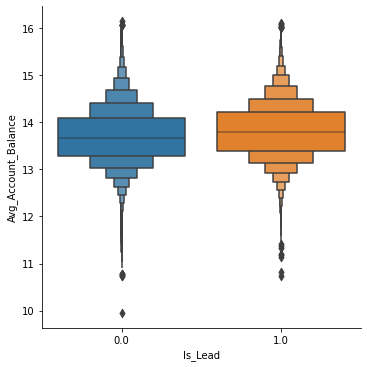

In [17]:
sns.catplot(x='Is_Lead', y='Avg_Account_Balance', kind='boxen', data=card)

### 2. Unique Values of the featues

In [18]:
card.nunique()

ID                     351037
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              3
Avg_Account_Balance    162137
Is_Active                   2
Is_Lead                     2
source                      2
dtype: int64

### 3. Is_Lead

In [19]:
card['Is_Lead'].value_counts(normalize= True)

0.0    0.762792
1.0    0.237208
Name: Is_Lead, dtype: float64

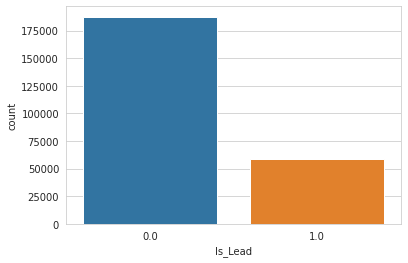

In [20]:
sns.set_style("whitegrid")
sns.countplot(x= 'Is_Lead', data= card)

There are certain class imbalance inthe data set

### 4. Gender

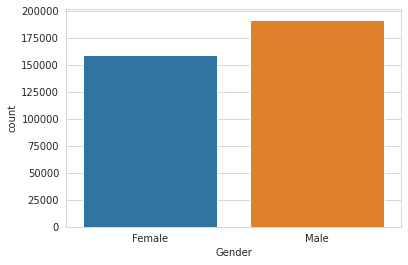

In [21]:
sns.set_style("whitegrid")
sns.countplot(x= 'Gender', data= card)

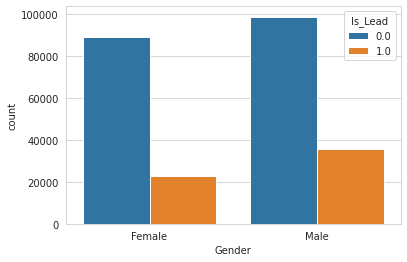

In [22]:
sns.set_style("whitegrid")
sns.countplot(x= 'Gender',hue= 'Is_Lead', data= card)

### 5. Age

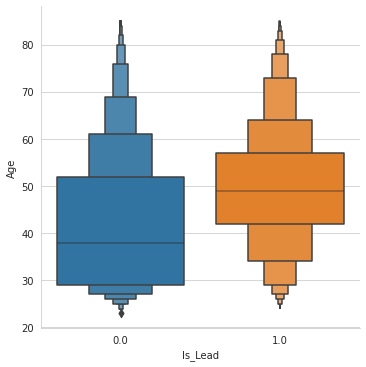

In [23]:
sns.catplot(x='Is_Lead', y='Age', kind='boxen', data=card)

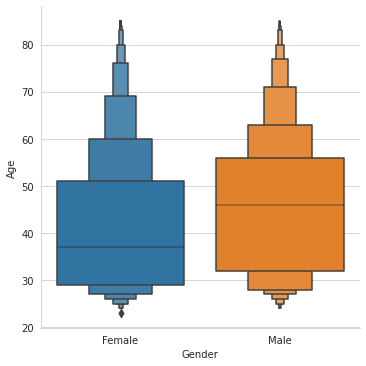

In [24]:
sns.catplot(x='Gender', y='Age', kind='boxen', data=card)

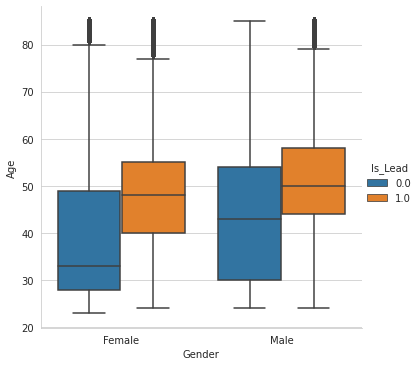

In [25]:
sns.catplot(x='Gender', y='Age', hue='Is_Lead', kind='box', data=card)

### 6. Region Code

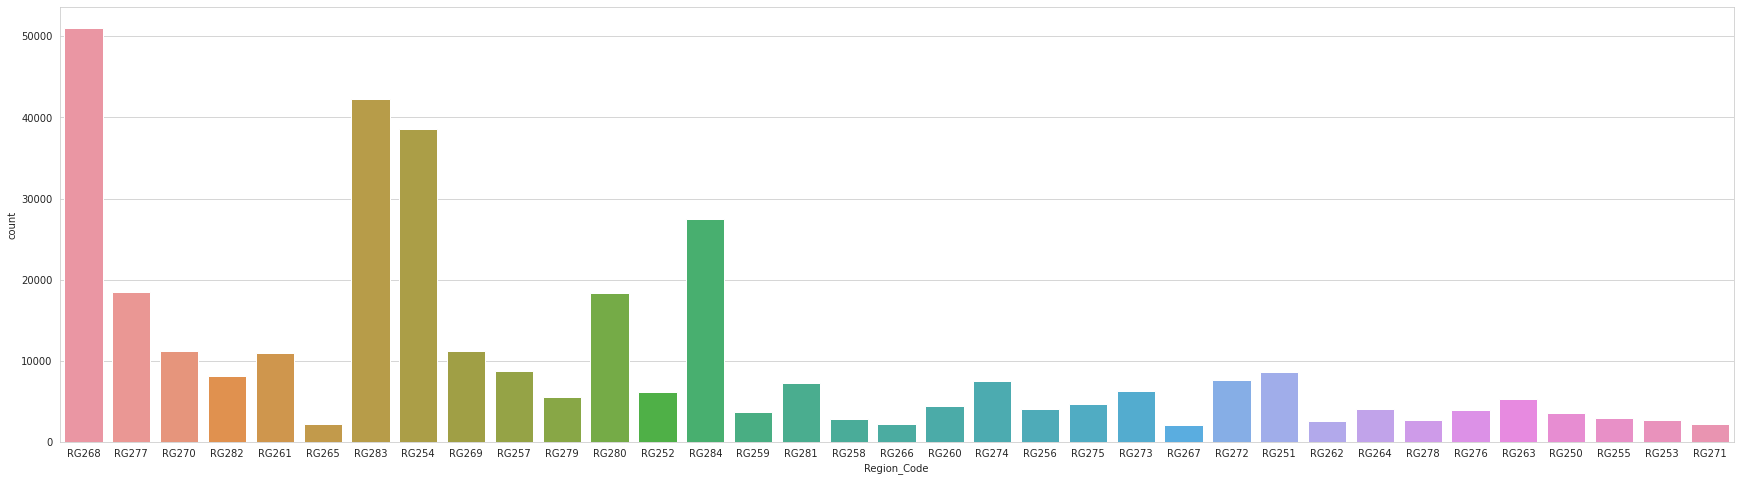

In [26]:
plt.subplots(figsize=(30, 8))
sns.set_style("whitegrid")
sns.countplot(x='Region_Code', data=card)

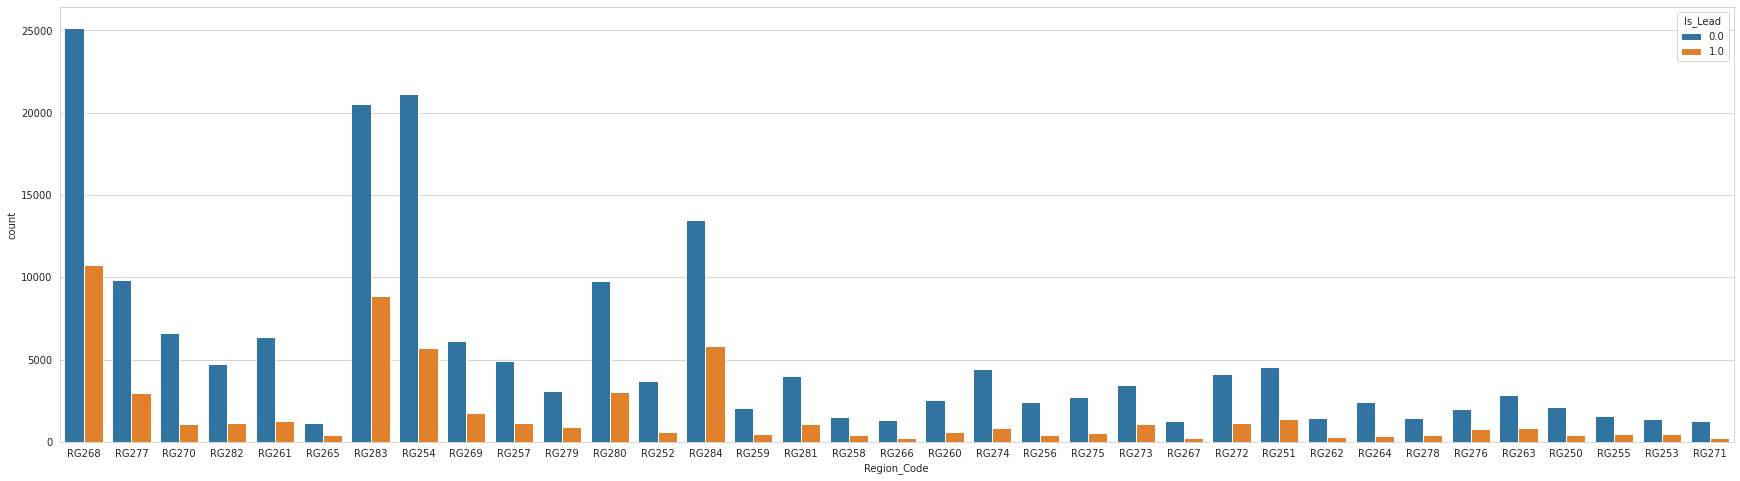

In [27]:
plt.subplots(figsize=(30, 8))
sns.set_style("whitegrid")
sns.countplot(x='Region_Code', hue='Is_Lead', data=card)

### 7. Occupation

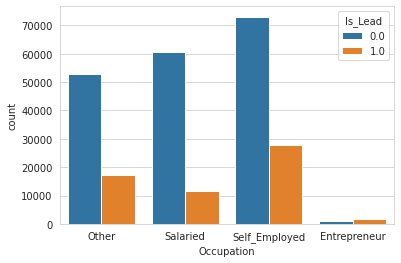

In [28]:
sns.set_style("whitegrid")
sns.countplot(x='Occupation', hue='Is_Lead', data=card)

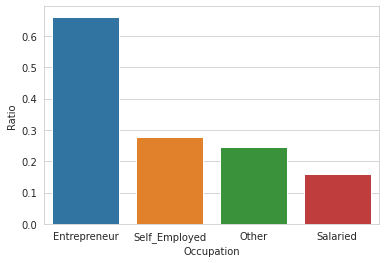

In [29]:
v=card.groupby('Occupation').Is_Lead.value_counts().unstack()
v['Ratio'] = v[1]/(v[0] + v[1])
v.reset_index(inplace=True)
sns.set_style("whitegrid")
sns.barplot(x='Occupation', y='Ratio', data=v.sort_values(by=['Ratio'], ascending=False))

### 8. Channel Code

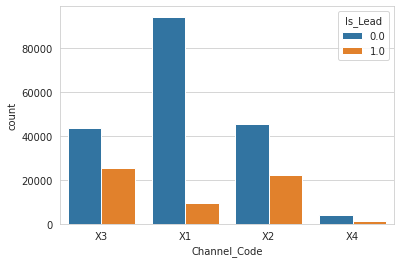

In [30]:
sns.set_style("whitegrid")
sns.countplot(x='Channel_Code', hue='Is_Lead', data=card)

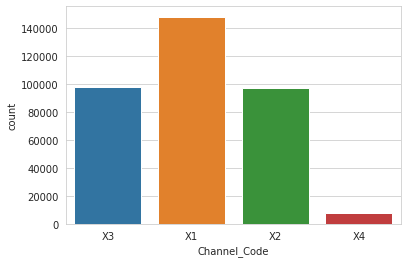

In [31]:
sns.set_style("whitegrid")
sns.countplot(x='Channel_Code', data=card)

### 9. Vintage

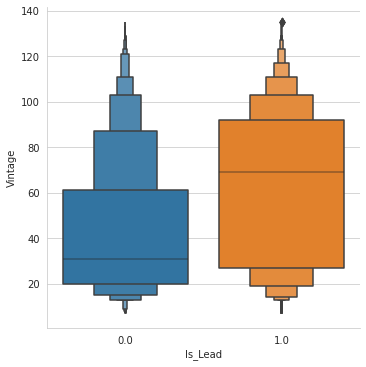

In [32]:
sns.catplot(x='Is_Lead', y='Vintage', kind='boxen', data=card)

### 10. Credit Product

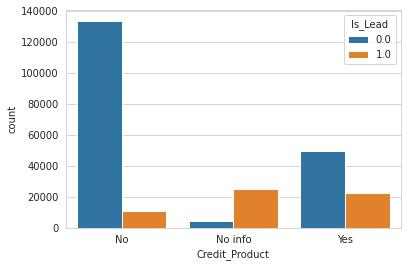

In [33]:
sns.set_style("whitegrid")
sns.countplot(x='Credit_Product', hue='Is_Lead', data=card)

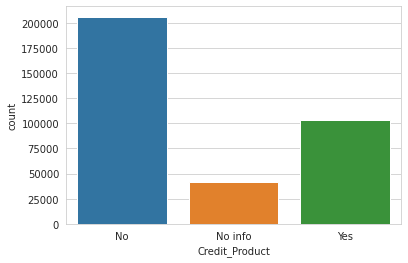

In [34]:
sns.countplot(x='Credit_Product', data=card)

### 11. Is Active

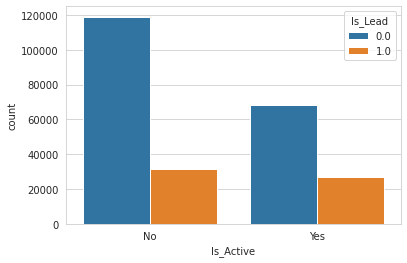

In [35]:
sns.set_style("whitegrid")
sns.countplot(x='Is_Active', hue='Is_Lead', data=card)

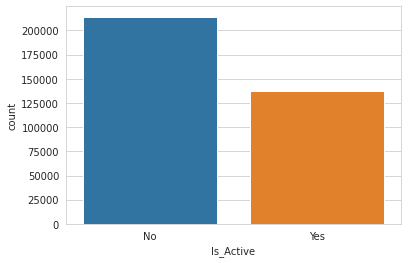

In [36]:
sns.set_style("whitegrid")
sns.countplot(x='Is_Active', data=card)

### Numerical Feature

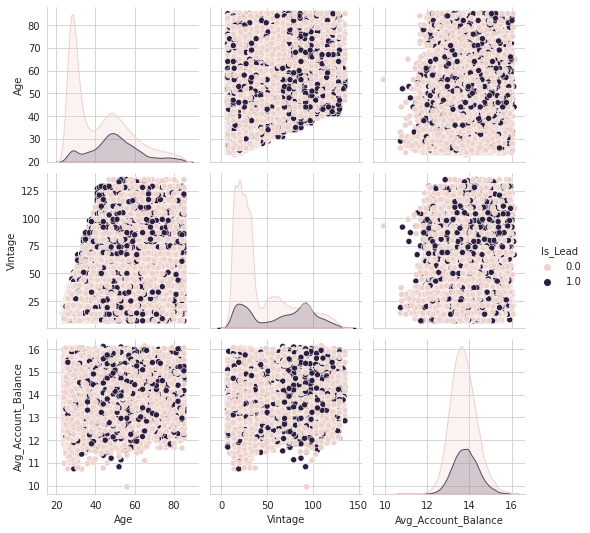

In [37]:
num_var=['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']
sns.pairplot(card[num_var], hue='Is_Lead')

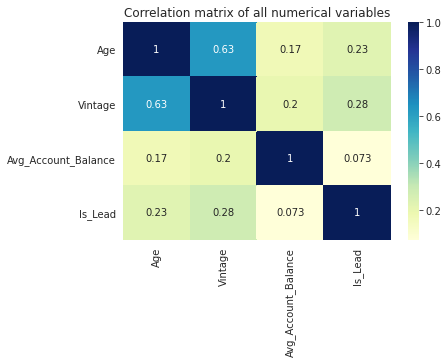

In [38]:
sns.heatmap(card.corr(), annot = True, cmap="YlGnBu")
plt.title('Correlation matrix of all numerical variables')
plt.show()

## Feature Encoding

In [39]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
card['Is_Lead'] = le.fit_transform(card['Is_Lead'])
var_mod = ['Gender','Occupation','Channel_Code','Credit_Product','Is_Active','Is_Lead','Region_Code']
le = LabelEncoder()
for i in var_mod:
    card[i] = le.fit_transform(card[i])

#One Hot Coding:
card = pd.get_dummies(card, columns=['Gender','Occupation','Channel_Code','Credit_Product','Is_Active','Region_Code'], drop_first= True)

In [40]:
card.head()

,ID,Age,Vintage,Avg_Account_Balance,Is_Lead,source,Gender_1,Occupation_1,Occupation_2,Occupation_3,Channel_Code_1,Channel_Code_2,Channel_Code_3,Credit_Product_1,Credit_Product_2,Is_Active_1,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_19,Region_Code_20,Region_Code_21,Region_Code_22,Region_Code_23,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_34
0,NNVBBKZB,73,43,13.860193,0,train,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,IDD62UNG,30,32,13.274205,0,train,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,HD3DSEMC,56,26,14.210464,0,train,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BF3NC7KV,34,19,13.061453,0,train,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TEASRWXV,30,33,13.695360,0,train,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
#Divide into test and train:
df = card.loc[card['source']=="train"]
df_test = card.loc[card['source']=="test"]

#Drop unnecessary columns:
df_test.drop(['Is_Lead','source'],axis=1,inplace=True)
df.drop(['source'],axis=1,inplace=True)
df.head()

,ID,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_1,Occupation_1,Occupation_2,Occupation_3,Channel_Code_1,Channel_Code_2,Channel_Code_3,Credit_Product_1,Credit_Product_2,Is_Active_1,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_19,Region_Code_20,Region_Code_21,Region_Code_22,Region_Code_23,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_34
0,NNVBBKZB,73,43,13.860193,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,IDD62UNG,30,32,13.274205,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,HD3DSEMC,56,26,14.210464,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BF3NC7KV,34,19,13.061453,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TEASRWXV,30,33,13.695360,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Clustering

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score

In [43]:
target = ['Is_Lead']
not_features = ['ID', 'Is_Lead']
cols = list(df.columns)
features = [feat for feat in cols if feat not in not_features]
print(features)

['Age', 'Vintage', 'Avg_Account_Balance', 'Gender_1', 'Occupation_1', 'Occupation_2', 'Occupation_3', 'Channel_Code_1', 'Channel_Code_2', 'Channel_Code_3', 'Credit_Product_1', 'Credit_Product_2', 'Is_Active_1', 'Region_Code_1', 'Region_Code_2', 'Region_Code_3', 'Region_Code_4', 'Region_Code_5', 'Region_Code_6', 'Region_Code_7', 'Region_Code_8', 'Region_Code_9', 'Region_Code_10', 'Region_Code_11', 'Region_Code_12', 'Region_Code_13', 'Region_Code_14', 'Region_Code_15', 'Region_Code_16', 'Region_Code_17', 'Region_Code_18', 'Region_Code_19', 'Region_Code_20', 'Region_Code_21', 'Region_Code_22', 'Region_Code_23', 'Region_Code_24', 'Region_Code_25', 'Region_Code_26', 'Region_Code_27', 'Region_Code_28', 'Region_Code_29', 'Region_Code_30', 'Region_Code_31', 'Region_Code_32', 'Region_Code_33', 'Region_Code_34']


In [44]:
kmeans = KMeans(n_clusters=3, random_state=42, n_jobs=-1)
kmeans.fit(df[features])

df['cluster'] = kmeans.predict(df[features])
df_test['cluster'] = kmeans.predict(df_test[features])

## Train Test Split

In [45]:
## Importing Libaries
from sklearn.model_selection import train_test_split

X= df.drop(columns= ['ID', "Is_Lead"], axis= 1)
y= df['Is_Lead']

X_train, X_test, y_train, y_test= train_test_split(X,y,stratify=y, random_state= 42, train_size= 0.70)

In [46]:
## !pip install catboost

## Model Evalution

### Random Forest Classifier

In [ ]:
##!pip install catboost

In [49]:
## Loading Libaries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

In [48]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100,10)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [20, 28, 37, 46, 55, 64, 73, 82, 91, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [56]:
!pip install tpot

     |████████████████████████████████| 92kB 2.8MB/s 
     |████████████████████████████████| 163kB 5.0MB/s 
     |████████████████████████████████| 166.7MB 87kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=a2509ac39b41dfb0db3ad81eace797838ff72c06726ceb9783431803ad6a5df9
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [50]:
from tpot import TPOTClassifier
cv = StratifiedKFold(n_splits=5, random_state=42)
model_rfc = TPOTClassifier(generations= 5, population_size= 25, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': random_grid}, 
                                 cv = cv, scoring = 'roc_auc')
model_rfc.fit(X_train,y_train)


Generation 1 - Current best internal CV score: 0.8716904223670557

Generation 2 - Current best internal CV score: 0.8716904223670557

Generation 3 - Current best internal CV score: 0.8716904223670557

Generation 4 - Current best internal CV score: 0.872054618450489

Generation 5 - Current best internal CV score: 0.872054618450489

Best pipeline: RandomForestClassifier(RandomForestClassifier(input_matrix, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=100), criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      20,
                                                                                      30,
                                                                                      40,
                                                                                      50,
                                                                                      60,
                                                                                      70,
                                                                                      80,
                                                                                      90

In [51]:
y_prob = model_rfc.predict_proba(X_test)[:,1]

No Skill: ROC AUC=0.500
Rondom Forest: ROC AUC=0.871


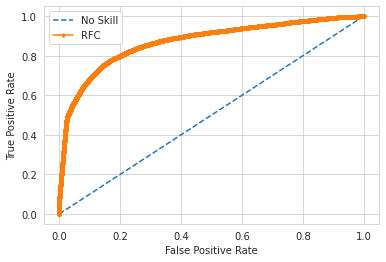

In [52]:
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = y_prob
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Rondom Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, threshold = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RFC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [65]:
score = pd.DataFrame({'tpr':lr_tpr,'fpr':lr_fpr,'thresh':threshold})
score.loc[(score['tpr']>.8) & (score['tpr']<0.85)]

,tpr,fpr,thresh
10114,0.800023,0.199641,0.197305
10115,0.800023,0.199676,0.197273
10116,0.800080,0.199676,0.197272
10117,0.800080,0.199730,0.197241
10118,0.800137,0.199730,0.197215
...,...,...,...
11969,0.849888,0.277854,0.131880
11970,0.849888,0.277872,0.131859
11971,0.849946,0.277872,0.131852
11972,0.849946,0.277943,0.131837


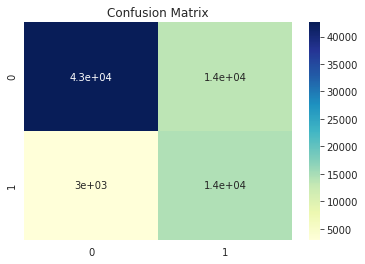

array([[42584, 13647],
       [ 2988, 14499]])

In [67]:
### Confusion Matrix
Y_pred= y_prob>0.4
sns.heatmap(confusion_matrix(y_test, Y_pred), annot = True, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()
confusion_matrix(y_test, Y_pred)

In [69]:
## ROC-AUC Score
print('Roc-Auc Score:', roc_auc_score(y_test, y_prob)*100,'%')

Roc-Auc Score: 87.14117333258436 %


## XG Boost

In [50]:
random_grid= {'n_estimators': [100], 'max_depth': range(1, 11), 
              'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.], 
              'subsample': np.arange(0.05, 1.01, 0.05), 
              'min_child_weight': range(1, 21), 
              'nthread': [1]}

In [51]:
from tpot import TPOTClassifier
cv= StratifiedKFold(n_splits=10,random_state= 42)
model_xgb= TPOTClassifier(generations=5, population_size=25, offspring_size=12,
                          verbosity= 2, early_stop= 12,
                          config_dict= {'xgboost.XGBClassifier': random_grid},
                          cv=cv, scoring= 'roc_auc')
model_xgb.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.8727596376057007

Generation 2 - Current best internal CV score: 0.8727596376057007

Generation 3 - Current best internal CV score: 0.8727596376057007

Generation 4 - Current best internal CV score: 0.8729304060020129

Generation 5 - Current best internal CV score: 0.8729304060020129

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=3, min_child_weight=18, n_estimators=100, nthread=1, subsample=0.8)


TPOTClassifier(config_dict={'xgboost.XGBClassifier': {'learning_rate': [0.001,
                                                                        0.01,
                                                                        0.1,
                                                                        0.5,
                                                                        1.0],
                                                      'max_depth': range(1, 11),
                                                      'min_child_weight': range(1, 21),
                                                      'n_estimators': [100],
                                                      'nthread': [1],
                                                      'subsample': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}},
               crossover_rate=0.1,
               cv=StratifiedKFold(n_splits=10, random_s

In [52]:
y_prob_xgb= model_xgb.predict_proba(X_test)[:,1]

No Skill: ROC AUC=0.500
XG Boost: ROC AUC=0.872


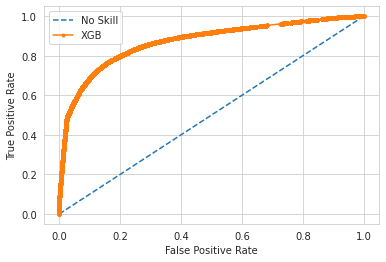

In [53]:
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = y_prob_xgb
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XG Boost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, threshold = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

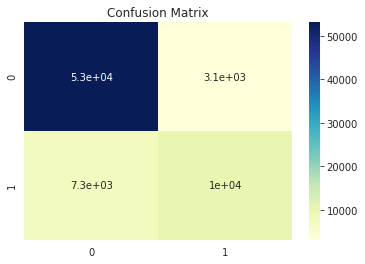

array([[53146,  3085],
       [ 7293, 10194]])

In [55]:
Y_pred_xgb= y_prob_xgb>0.45
sns.heatmap(confusion_matrix(y_test, Y_pred_xgb), annot = True, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()
confusion_matrix(y_test, Y_pred_xgb)

In [56]:
## ROC-AUC Score
print('Roc-Auc Score:', roc_auc_score(y_test, y_prob_xgb)*100,'%')

Roc-Auc Score: 87.17095128198223 %


In [64]:
### Classification Report
print("Classification report: {}".format(classification_report(y_test,Y_pred_xgb)))

Classification report:               precision    recall  f1-score   support

           0       0.88      0.95      0.91     56231
           1       0.77      0.58      0.66     17487

    accuracy                           0.86     73718
   macro avg       0.82      0.76      0.79     73718
weighted avg       0.85      0.86      0.85     73718



## LightGM Boosting

In [51]:
## Number of boosters 
boosting_type= ['gbdt', 'dart', 'goss', 'rf']
# Maximum number of levels in tree
max_depth = [10, 50, 100, 500]
# Number of trees in random forest
n_estimators = [50, 100, 250, 500]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15, 20]
## Objective
objective= ['binary','multiclass']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'boosting_type': boosting_type,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'objective': objective
               }
print(random_grid)

{'n_estimators': [50, 100, 250, 500], 'boosting_type': ['gbdt', 'dart', 'goss', 'rf'], 'max_depth': [10, 50, 100, 500], 'min_samples_split': [5, 10, 15, 20], 'objective': ['binary', 'multiclass']}


In [58]:
from tpot import TPOTClassifier
cv = StratifiedKFold(n_splits=10, random_state=42)
model_lgb = TPOTClassifier(generations= 2, population_size= 25, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'lightgbm.LGBMClassifier': random_grid}, 
                                 cv = cv, scoring = 'roc_auc')
model_lgb.fit(X_train,y_train)


Generation 1 - Current best internal CV score: 0.8742260868113629

Generation 2 - Current best internal CV score: 0.8742260868113629

Best pipeline: LGBMClassifier(input_matrix, boosting_type=gbdt, max_depth=500, min_samples_split=15, n_estimators=50, objective=binary)


TPOTClassifier(config_dict={'lightgbm.LGBMClassifier': {'boosting_type': ['gbdt',
                                                                          'dart',
                                                                          'goss',
                                                                          'rf'],
                                                        'max_depth': [10, 50,
                                                                      100,
                                                                      500],
                                                        'min_samples_split': [5,
                                                                              10,
                                                                              15,
                                                                              20],
                                                        'n_estimators': [50,
                                       

In [59]:
y_prob_lgb= model_lgb.predict_proba(X_test)[:,1]
y_pred_lgb= np.where(y_prob_lgb> 0.4, 1,0)

No Skill: ROC AUC=0.500
Light GBM: ROC AUC=0.873


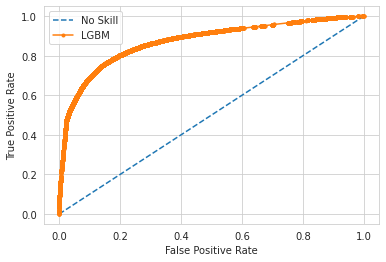

In [60]:
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = y_prob_lgb
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Light GBM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, threshold = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LGBM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

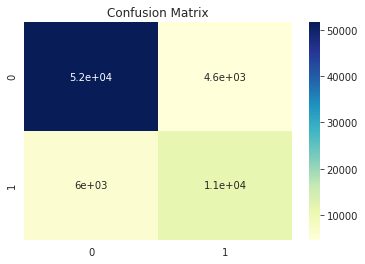

array([[51582,  4649],
       [ 5993, 11494]])

In [61]:
## Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot = True, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()
confusion_matrix(y_test, y_pred_lgb)

In [62]:
### Classification Report
print("Classification report: {}".format(classification_report(y_test,y_pred_lgb)))

Classification report:               precision    recall  f1-score   support

           0       0.90      0.92      0.91     56231
           1       0.71      0.66      0.68     17487

    accuracy                           0.86     73718
   macro avg       0.80      0.79      0.80     73718
weighted avg       0.85      0.86      0.85     73718



In [63]:
## ROC-AUC Score
print('Roc-Auc Score:', roc_auc_score(y_test, y_prob_lgb)*100,'%')

Roc-Auc Score: 87.29037234067853 %


Comparing 3 ROC_AUC Score LightGM Classifier have the highest score with 87.29%. I tested it on the external test datatset, the roc_auc score was 87.21%. 